In [48]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def triangular(t, tau, f_max=1):
    """Returns the triangular wave of amplitude f_max and even about the 
    origin at time t. The period is tau. It is defined as a scalar 
    function (i.e., only one value of t can be passed at a time). 
    """
    if np.floor(t) % 2 == 0:
        t_adjust = t - np.floor(t)
        return 1. - 2.*t_adjust / tau
    else:
        t_adjust = t - (np.floor(t) + 1)
        return 1. + 2.*t_adjust / tau

def x_coeffs_by_hand(N_max, nat_per, f_max=1):
    """Fourier coefficients calculated by hand and loaded into an array
        as pairs in the form (a_n, b_n).  
    """
    # initialize the array with the vaues of a_0 and b_0
    coeffs_array = [(f_max/(2* (np.pi*2./nat_per)**2), 0)] 
    for n in np.arange(1, N_max, 1):
        # these are pre-calcualated values of a_n and b_n
        a_n = f_max*2.*(1-(-1)**n)/(n**2 * np.pi**3 * np.sqrt((np.pi*(2./nat_per)**2-np.pi*n**2)**2+0.04*n**2))
        b_n = 0.
        coeffs_array.append((a_n, b_n))  # add them to the end of the array   
    return np.array(coeffs_array)  # convert to a numpy array to be safe

def Fourier_reconstruct(t_pts, coeffs_array, N_max, nat_per):
    """Sum up the Fourier series up to n = N_max terms."""
    omega = 2. * np.pi / nat_per   # definition of omega
    
    result = 0.
    # iterate over coefficients but only up to N_max
    for n, (a,b) in enumerate(coeffs_array[:N_max+1]):
        delta_n = np.arctan2((0.2*n),(np.pi*((2/nat_per)**2-n**2)))
        result = result + a * np.cos(n * omega * t_pts - delta_n) \
                    + b * np.sin(n * omega * t_pts - delta_n)
    return result    


In [49]:
N_max = 20

f_max = 1.


x_coeffs_2 = x_coeffs_by_hand(N_max=N_max, nat_per=2, f_max=f_max)

x_coeffs_3 = x_coeffs_by_hand(N_max=N_max, nat_per=3, f_max=f_max)


t_pts = np.arange(-2., 6., .01)

f_pts_2 = Fourier_reconstruct(t_pts, x_coeffs_2, 4, 2)
f_pts_3 = Fourier_reconstruct(t_pts, x_coeffs_3, 4, 3)

driving_pts = np.array([triangular(t, 2, f_max) for t in t_pts])




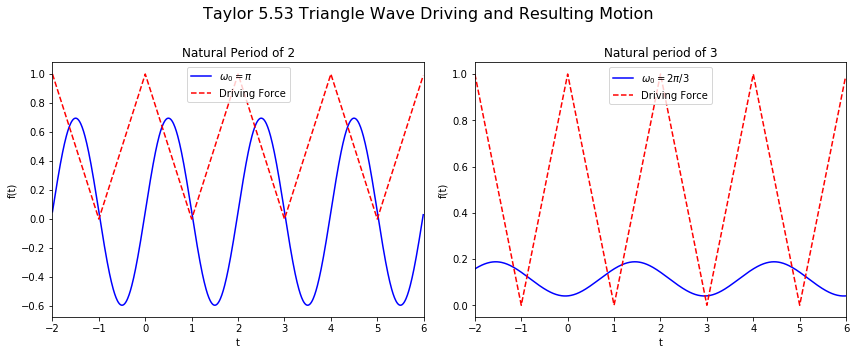

In [50]:
fig_1 = plt.figure(figsize=(12,5))

ax_1 = fig_1.add_subplot(1,2,1)
ax_1.plot(t_pts, f_pts_2, label=r'$\omega _0=\pi$', color='blue')
ax_1.plot(t_pts, driving_pts, label='Driving Force', color='red', linestyle='dashed')
ax_1.set_xlim(-2,6)
ax_1.set_xlabel('t')
ax_1.set_ylabel('f(t)')
ax_1.set_title('Natural Period of 2')
ax_1.legend()

ax_2 = fig_1.add_subplot(1,2,2)
ax_2.plot(t_pts, f_pts_3, label=r'$\omega _0= 2 \pi / 3$', color='blue')
ax_2.plot(t_pts,driving_pts, label='Driving Force', color='red', linestyle='dashed')
ax_2.set_xlim(-2,6)
ax_2.set_xlabel('t')
ax_2.set_ylabel('f(t)')
ax_2.set_title('Natural period of 3')
ax_2.legend();


fig_1.suptitle("Taylor 5.53 Triangle Wave Driving and Resulting Motion", fontsize=16)
fig_1.tight_layout(rect=[0, 0.003, 1, 0.9])
fig_1.savefig('Taylor_5.53.png')